## 1. ASK:
- Question: the relation between customers' characteristics & the churn

## 2. PREPARE:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math

%matplotlib inline

In [2]:
df = pd.read_csv('Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
print(df.shape)
print(df.columns)

(7032, 21)
Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')


In [4]:
for col in df.columns:
    print(f'{col}: {df[col].unique()}')

#tenure: the number of months customers have stayed with the company

customerID: ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 '

In [5]:
df['Churn'].value_counts()

No     5163
Yes    1869
Name: Churn, dtype: int64

## 3. Process:

### 3.1 Cleaning Data:

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


Insights: There's non-null data

#### Remove the str (automatic) out of the column PaymentMethod

In [7]:
df['PaymentMethod'] = df['PaymentMethod'].str.replace(' (automatic)', '',regex=False)
df['PaymentMethod'].unique()

array(['Electronic check', 'Mailed check', 'Bank transfer', 'Credit card'],
      dtype=object)

### 3.2 Visualization:

#### The target label:

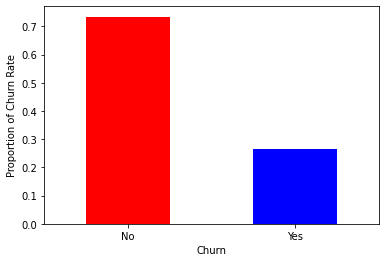

In [8]:
churn_rate = df['Churn'].value_counts(normalize=True) #get the percentage
churn_rate.plot(kind='bar', color=['red', 'blue'])
plt.xlabel('Churn')
plt.ylabel('Proportion of Churn Rate')
plt.xticks(rotation=0);

Unbalanced dataset. With the "No" churn group takes up to around 74% and may affect the final result (specifically increase the FN)

#### Target label vs independent labels:

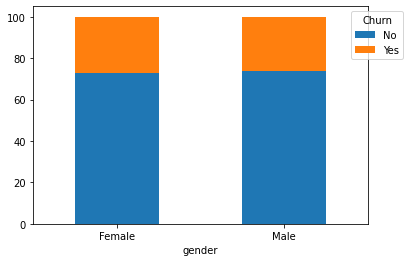

In [9]:
prop_by_independent = pd.crosstab(df['gender'], df['Churn']).apply(lambda x: x/x.sum()*100, axis = 1)
prop_by_independent.plot(kind='bar', stacked=True)
plt.xticks(rotation=0)
plt.legend(loc='upper right', fancybox=True, bbox_to_anchor=(0.62, 0.5, 0.5, 0.5), title='Churn')
# fig.suptitle(super_title, fontsize=22,  y=.95)

#### Categorical Independent Variables:

In [10]:
### Write percentage plot function
def percentage_stacked_plot(columns_to_plot, super_title):
    number_of_columns = 2
    number_of_rows = math.ceil(len(columns_to_plot) / 2)

    plt.figure(figsize=(12, 5 * number_of_rows), dpi=80)
    plt.suptitle(super_title, fontsize=15, y=.95)

    for index, col in enumerate(columns_to_plot, 1):
        ax = plt.subplot(number_of_rows, number_of_columns, index)
        frequency_table = pd.crosstab(df[col], df['Churn']).apply(lambda x : x/x.sum() * 100, axis=1)
        frequency_table.plot(kind='bar', stacked=True, ax=ax)
        plt.xticks(rotation=0)
        plt.legend(loc='upper right', fancybox=True, bbox_to_anchor=(0.62, 0.5, 0.5, 0.5), title='Churn')
        plt.title(f'Churn Proportion of {col}')

        # Remove the spine
        for spine_name in ('left', 'right', 'bottom', 'top'):
            ax.spines[spine_name].set_visible(False)
        

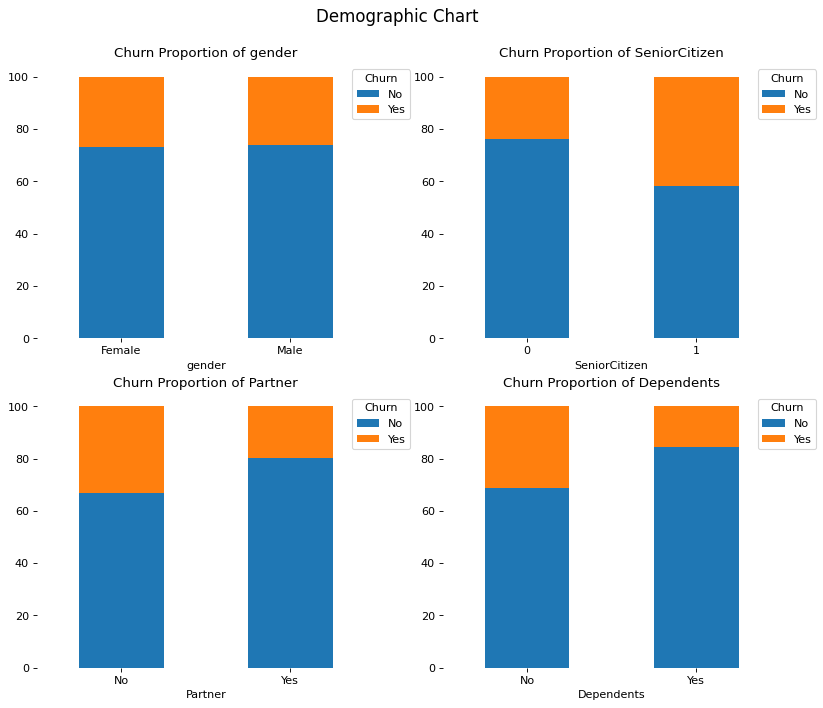

In [11]:
percentage_stacked_plot(['gender', 'SeniorCitizen', 'Partner', 'Dependents'], 'Demographic Chart')

- 1.Churn Rate between Male & Female is quite the same
- 2.Churn Rate in senior citizen is higher than young people
- 3.Churn Rate in people who don't have partner is also higher than people who have
- 4.Churn Rate in people who don't have dependents is also higher than people who have
- 3 & 4 --> these two are quite the same

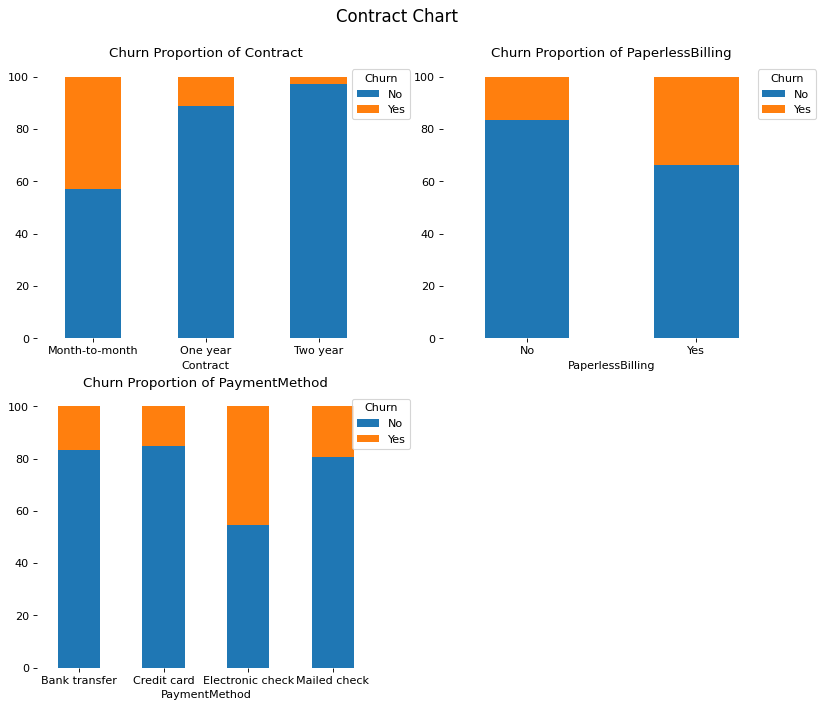

In [12]:
percentage_stacked_plot(['Contract', 'PaperlessBilling', 'PaymentMethod'], 'Contract Chart')

- 1. People who have contract month-to-month have significantly high churn rate (~98, 97%) compared to others
- 2. People who use paperless billing also have higher churn rate
- 3. People who use electronic check has quite high churn rate (>50%)

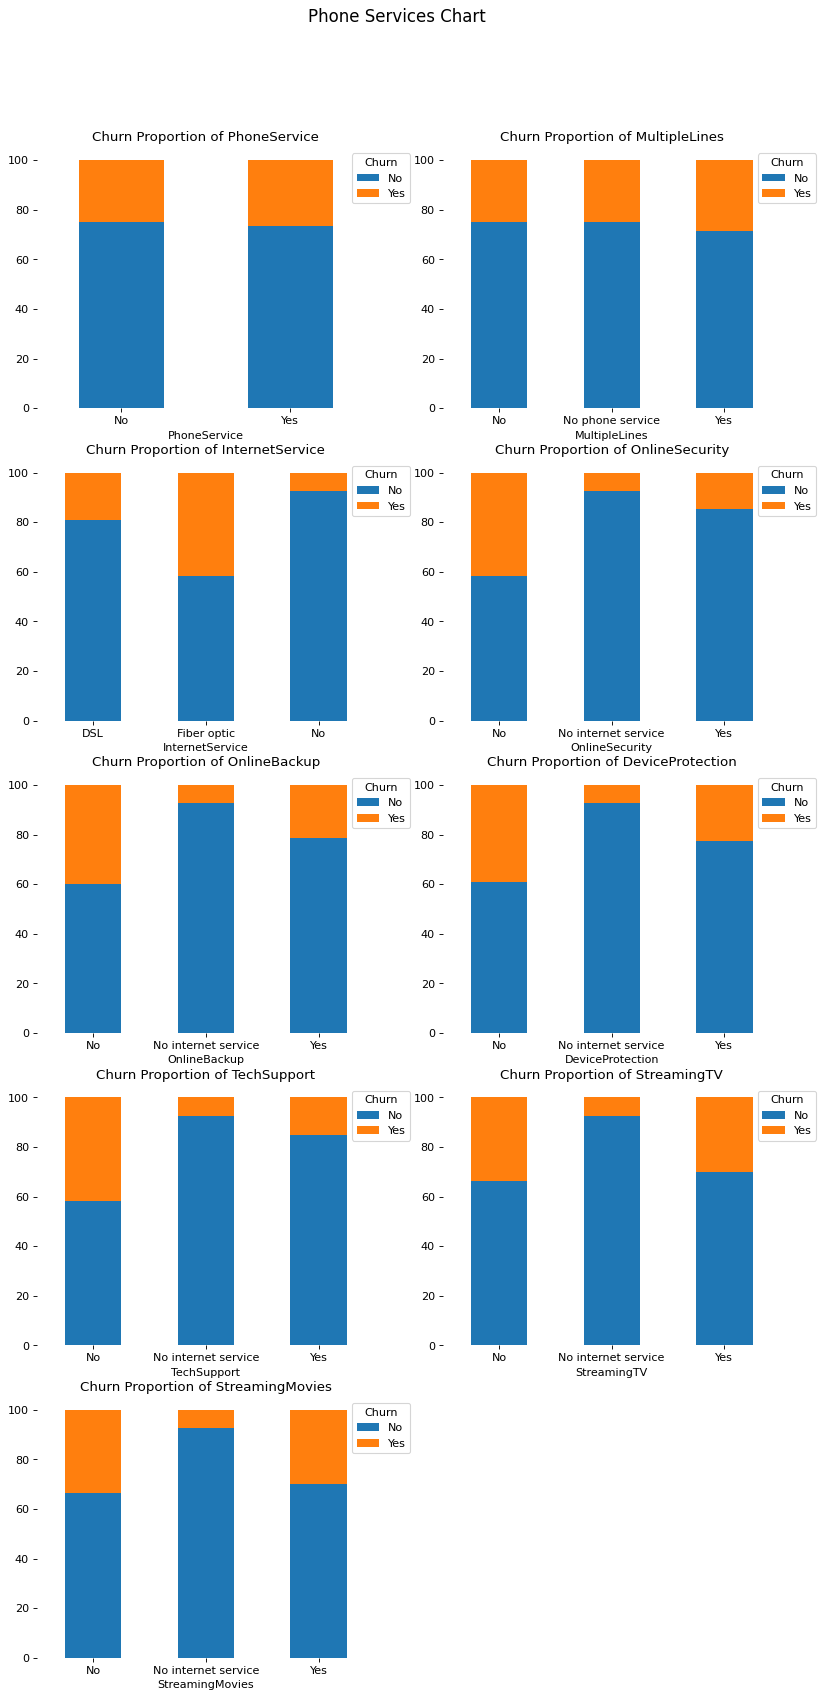

In [13]:
percentage_stacked_plot([ 'PhoneService', 'MultipleLines', 'InternetService','OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport','StreamingTV', 'StreamingMovies'], 'Phone Services Chart')

- Phone Service is not a factor that will have impact on churn rate
- People who don't have online security, online backup, device protection, tech support & streaming TV & streaming movies 

#### Numerical Independent Variables:

In [14]:
def histogram_plot(columns_to_plot, super_title):
    number_of_columns = 2
    number_of_rows = math.ceil(len(columns_to_plot) / 2)

    plt.figure(figsize=(14, 5 * number_of_rows), dpi=90)
    plt.suptitle(super_title, fontsize=15, y=.95)

    for index, col in enumerate(columns_to_plot, 1):
        ax = plt.subplot(number_of_rows, number_of_columns, index)
        df[df['Churn'] == 'No'][col].plot(kind='hist', ax=ax, density=True, alpha = 0.5, label='No')
        df[df['Churn'] == 'Yes'][col].plot(kind='hist', ax=ax, density=True, alpha = 0.5, label='Yes')

        plt.xticks(rotation=0)
        plt.legend(loc='upper right', fancybox=True, bbox_to_anchor=(0.4, 0.5, 0.5, 0.5), title='Churn')
        plt.title(f'Churn Proportion of {col}')

        # Remove the spine
        for spine_name in ('left', 'right', 'bottom', 'top'):
            ax.spines[spine_name].set_visible(False)
        

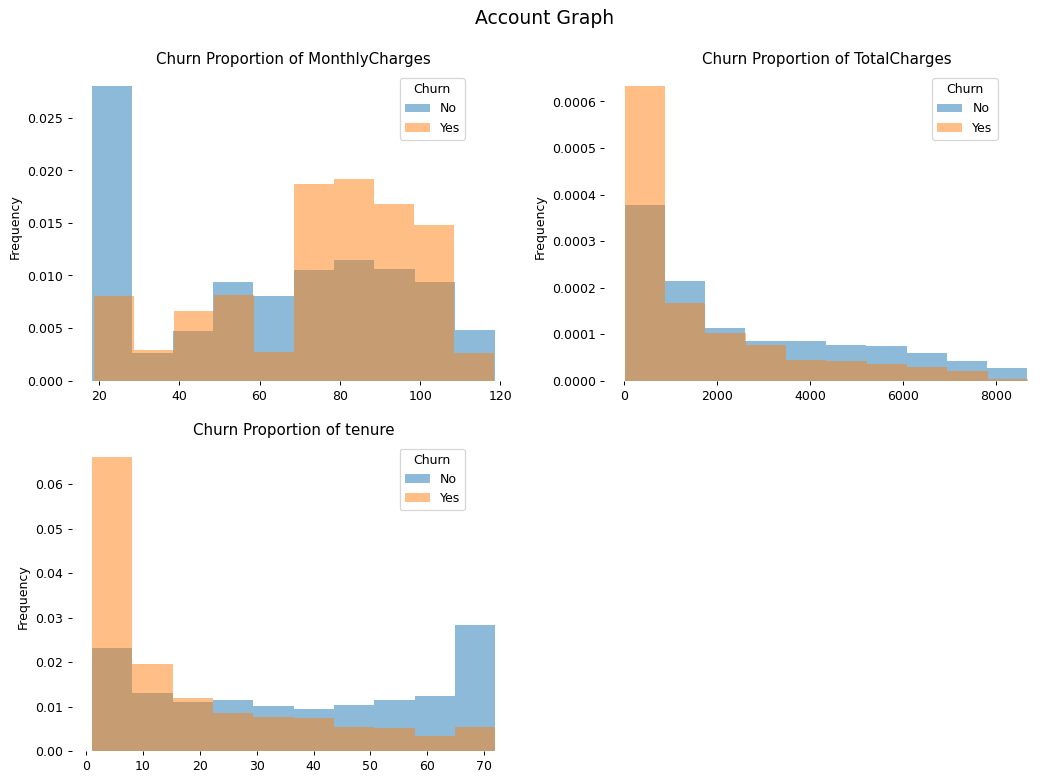

In [15]:
histogram_plot(['MonthlyCharges', 'TotalCharges','tenure'], 'Account Graph')

- 1.People who was charged monthly higher (~70) are more likely to churn
- 2.People who was charged total less are more likely to leave
- 3.People who spent less time with the company are also more like to churn

### 3.3 Feature Importances:

#### Calculate feature importances between categorical independent variables & dependent vars:

In [16]:
from sklearn.metrics import mutual_info_score
def mutual_info_score_method (col):
    return mutual_info_score(col, df['Churn'])

df[['gender', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod']].apply(mutual_info_score_method).sort_values(ascending=False)


Contract            0.098182
OnlineSecurity      0.064528
TechSupport         0.062873
InternetService     0.055394
OnlineBackup        0.046659
PaymentMethod       0.044423
DeviceProtection    0.043784
StreamingMovies     0.031918
StreamingTV         0.031803
PaperlessBilling    0.019119
Dependents          0.014270
Partner             0.011383
MultipleLines       0.000798
PhoneService        0.000069
gender              0.000037
dtype: float64

Correct with our predictions earlier that MultipleLines, PhoneService & gender don't have strong relationship with our target variable. Thus we should remove them from dataset

<AxesSubplot:>

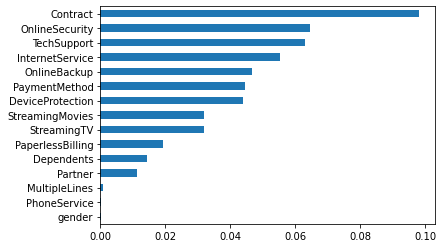

In [17]:
df[['gender', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod']].apply(mutual_info_score_method).sort_values(ascending=True).plot(kind='barh')

### 3.4 Feature Engineering

In [18]:
df = df.drop('customerID', axis=1)

#### Categorical Variable

In [19]:
X_cat = pd.get_dummies(df[df.select_dtypes(include='object').columns.to_list()].drop('Churn', axis=1), drop_first=True)
X_cat.shape

(7032, 26)

#### Concat with numerical columns

In [20]:
X = pd.concat([X_cat, df[['MonthlyCharges', 'TotalCharges','tenure']]], axis=1)
print(X.shape)
print(X.columns)

(7032, 29)
Index(['gender_Male', 'Partner_Yes', 'Dependents_Yes', 'PhoneService_Yes',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes',
       'PaymentMethod_Credit card', 'PaymentMethod_Electronic check',
       'PaymentMethod_Mailed check', 'MonthlyCharges', 'TotalCharges',
       'tenure'],
      dtype='object')


In [21]:
y = df['Churn'].replace({'No': 0, 'Yes': 1})

## 4. ANALYZE:

### 4.1 Built-in Functions:

In [22]:
### Import library
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report
from sklearn.model_selection import train_test_split

### Scaling
def scaling_data(X_train, X_test):
    scaler = StandardScaler()
    col = ['MonthlyCharges', 'TotalCharges','tenure']
    X_train[col] = scaler.fit_transform(X_train[col])
    X_test[col] = scaler.transform(X_test[col])
    return X_train, X_test

### Built-in report
names = []
models = []
acc_scores = []
auc_scores = []

def report(name, model, is_scaled=0):
    X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.25, shuffle=True, random_state=42)
    if is_scaled == 1:
        X_train, X_test = scaling_data(X_train, X_test)
        
    model.fit(X_train, y_train)
    y_preds = model.predict(X_test)

    names.append(name)
    models.append(model)
    acc_scores.append(accuracy_score(y_test, y_preds))
    auc_scores.append(roc_auc_score(y_test, y_preds))
    
    print('-'*7 + name + '-'*7)
    print('1. Accuracy score: {:.4f}'.format(acc_scores[-1]))
    print('2. ROC AUC score: {:.4f}'.format(auc_scores[-1]))
    print('3. Confusion Matrix: ')
    print(classification_report(y_test, y_preds))


### 4.2 Model Training:

### Baseline Model:

In [23]:
#####               Model using distance to calculate

from sklearn.linear_model import LogisticRegression
report('logistic_regression', LogisticRegression(random_state=101), 1)

from sklearn.neighbors import KNeighborsClassifier
report('k-nn', KNeighborsClassifier(), 1)

from sklearn.svm import SVC
report('support_vector_classifier', SVC(random_state=101), 1)


#####               Tree-based model

from sklearn.ensemble import RandomForestClassifier
report('random_forest', RandomForestClassifier(random_state=101), 0)

from sklearn.ensemble import GradientBoostingClassifier
report('gradient-boosting', GradientBoostingClassifier(random_state=101), 0)

import lightgbm as lgbm
report('lgbm', lgbm.LGBMClassifier(random_state=101), 0)

-------logistic_regression-------
1. Accuracy score: 0.7918
2. ROC AUC score: 0.7030
3. Confusion Matrix: 
              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1300
           1       0.62      0.52      0.56       458

    accuracy                           0.79      1758
   macro avg       0.73      0.70      0.71      1758
weighted avg       0.78      0.79      0.79      1758

-------k-nn-------
1. Accuracy score: 0.7560
2. ROC AUC score: 0.6809
3. Confusion Matrix: 
              precision    recall  f1-score   support

           0       0.83      0.84      0.84      1300
           1       0.53      0.52      0.53       458

    accuracy                           0.76      1758
   macro avg       0.68      0.68      0.68      1758
weighted avg       0.75      0.76      0.76      1758

-------support_vector_classifier-------
1. Accuracy score: 0.7929
2. ROC AUC score: 0.6861
3. Confusion Matrix: 
              precision    recall 

In [24]:
df_baseline = pd.DataFrame({'names': names, 'accuracy_scores': np.around(acc_scores,5), 'auc_scores': np.around(auc_scores,5)}).set_index('names')
df_baseline.sort_values(by='accuracy_scores', ascending=False)

,accuracy_scores,auc_scores
names,,
support_vector_classifier,0.79295,0.68606
logistic_regression,0.79181,0.70296
gradient-boosting,0.79181,0.69943
random_forest,0.78783,0.68189
lgbm,0.78385,0.69122
k-nn,0.75597,0.68085


- Overall, except for knn which has the lowest score among all models, the other 5 models have accuracy_score & auc_score not that much difference.
- Even though logistic regression has high accuracy_score and auc_scores but when looking at the recall score for class 1, it's a little bit under performed compared to other models.
- Model choosen to tune: gradient boosting, support vector machine.

### Hyperparameter Tuning:

### 1. Gradient Boosting

#### GridSearch CV:

In [25]:
### Build pipeline
from sklearn.model_selection import GridSearchCV, RepeatedStratifiedKFold

gb_param_grid = {
                'learning_rate': [0.1, 0.2, 0.3, 0.5],
                'n_estimators':  [70,80,90],
                'max_depth': [1,2,3],
                'max_features': ['sqrt', 'log2'],
                'random_state': [101]
                }

gb_grid_model = GridSearchCV(GradientBoostingClassifier(), param_grid = gb_param_grid, verbose=2, cv=RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1))
report('gradient-boosting-grid', gb_grid_model, 0)

Fitting 30 folds for each of 72 candidates, totalling 2160 fits
[CV] END learning_rate=0.1, max_depth=1, max_features=sqrt, n_estimators=70, random_state=101; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=1, max_features=sqrt, n_estimators=70, random_state=101; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=1, max_features=sqrt, n_estimators=70, random_state=101; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=1, max_features=sqrt, n_estimators=70, random_state=101; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=1, max_features=sqrt, n_estimators=70, random_state=101; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=1, max_features=sqrt, n_estimators=70, random_state=101; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=1, max_features=sqrt, n_estimators=70, random_state=101; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=1, max_features=sqrt, n_estimators=70, random_state=101; total time=   0.0s
[CV] END learning_rate=0

In [26]:
gb_grid_model.best_params_

{'learning_rate': 0.2,
 'max_depth': 2,
 'max_features': 'sqrt',
 'n_estimators': 80,
 'random_state': 101}

In [27]:
df_baseline = pd.DataFrame({'names': names, 'accuracy_scores': np.around(acc_scores,5), 'auc_scores': np.around(auc_scores,5)}).set_index('names')
df_baseline.sort_values(by='accuracy_scores', ascending=False)

,accuracy_scores,auc_scores
names,,
gradient-boosting-grid,0.79579,0.70141
support_vector_classifier,0.79295,0.68606
logistic_regression,0.79181,0.70296
gradient-boosting,0.79181,0.69943
random_forest,0.78783,0.68189
lgbm,0.78385,0.69122
k-nn,0.75597,0.68085


- Gradient Boosting Classifier is usually biased toward the classes with most observations. 
- Tunning hyper-parameters has slightly increased the accuracy of model.

### 2. Support Vector Machine

#### GridSerachCV

In [28]:
### Build pipeline
from sklearn.model_selection import GridSearchCV, RepeatedStratifiedKFold

gb_param_grid = {
                'kernel': ['poly', 'rbf', 'linear'],
                'degree':  [3,4,5,6],
                'C': [1,5,10],
                'gamma': ['scale'],
                'class_weight': ['balanced'],
                'max_iter':[100000],
                'random_state': [101]
                }

svc_grid_model = GridSearchCV(SVC(), param_grid = gb_param_grid, verbose=2, cv=10, scoring='accuracy')
report('svc-grid', svc_grid_model, 1)

Fitting 10 folds for each of 36 candidates, totalling 360 fits


[CV] END C=1, class_weight=balanced, degree=3, gamma=scale, kernel=poly, max_iter=100000, random_state=101; total time=   1.1s
[CV] END C=1, class_weight=balanced, degree=3, gamma=scale, kernel=poly, max_iter=100000, random_state=101; total time=   0.7s
[CV] END C=1, class_weight=balanced, degree=3, gamma=scale, kernel=poly, max_iter=100000, random_state=101; total time=   0.7s
[CV] END C=1, class_weight=balanced, degree=3, gamma=scale, kernel=poly, max_iter=100000, random_state=101; total time=   0.7s
[CV] END C=1, class_weight=balanced, degree=3, gamma=scale, kernel=poly, max_iter=100000, random_state=101; total time=   0.6s
[CV] END C=1, class_weight=balanced, degree=3, gamma=scale, kernel=poly, max_iter=100000, random_state=101; total time=   0.7s
[CV] END C=1, class_weight=balanced, degree=3, gamma=scale, kernel=poly, max_iter=100000, random_state=101; total time=   0.7s
[CV] END C=1, class_weight=balanced, degree=3, gamma=scale, kernel=poly, max_iter=100000, random_state=101; tot

In [29]:
svc_grid_model.best_estimator_

SVC(C=1, class_weight='balanced', max_iter=100000, random_state=101)

In [30]:
df_baseline = pd.DataFrame({'names': names, 'accuracy_scores': np.around(acc_scores,5), 'auc_scores': np.around(auc_scores,5)}).set_index('names')
df_baseline.sort_values(by='accuracy_scores', ascending=False)

,accuracy_scores,auc_scores
names,,
gradient-boosting-grid,0.79579,0.70141
support_vector_classifier,0.79295,0.68606
logistic_regression,0.79181,0.70296
gradient-boosting,0.79181,0.69943
random_forest,0.78783,0.68189
lgbm,0.78385,0.69122
k-nn,0.75597,0.68085
svc-grid,0.73663,0.74768


### Solve unbalanced dataset:

In [31]:
### Keep an original dataset for later use
X_copy = X.copy()
y_copy = y.copy()

In [32]:
y.value_counts(normalize=True)

0    0.734215
1    0.265785
Name: Churn, dtype: float64

### SMOTETomek

In [33]:
from imblearn.combine import SMOTETomek
smk = SMOTETomek()
X, y = smk.fit_resample(X, y)
print(X_copy.shape, y_copy.shape)
print(X.shape, y.shape)

(7032, 29) (7032,)
(9450, 29) (9450,)


In [34]:
from sklearn.linear_model import LogisticRegression
report('logistic_regression_SMOTETomek', LogisticRegression(random_state=101), 1)

from sklearn.neighbors import KNeighborsClassifier
report('k-nn_SMOTETomek', KNeighborsClassifier(), 1)

from sklearn.svm import SVC
report('support_vector_classifier_SMOTETomek', SVC(random_state=101), 1)

from sklearn.ensemble import RandomForestClassifier
report('random_forest_SMOTETomek', RandomForestClassifier(random_state=101), 0)

from sklearn.ensemble import GradientBoostingClassifier
report('gradient-boosting_SMOTETomek', GradientBoostingClassifier(random_state=101), 0)

import lightgbm as lgbm
report('lgbm_SMOTETomek', lgbm.LGBMClassifier(random_state=101), 0)

-------logistic_regression_SMOTETomek-------
1. Accuracy score: 0.8477
2. ROC AUC score: 0.8478
3. Confusion Matrix: 
              precision    recall  f1-score   support

           0       0.86      0.84      0.85      1204
           1       0.84      0.86      0.85      1159

    accuracy                           0.85      2363
   macro avg       0.85      0.85      0.85      2363
weighted avg       0.85      0.85      0.85      2363

-------k-nn_SMOTETomek-------
1. Accuracy score: 0.8227
2. ROC AUC score: 0.8238
3. Confusion Matrix: 
              precision    recall  f1-score   support

           0       0.87      0.77      0.81      1204
           1       0.78      0.88      0.83      1159

    accuracy                           0.82      2363
   macro avg       0.83      0.82      0.82      2363
weighted avg       0.83      0.82      0.82      2363

-------support_vector_classifier_SMOTETomek-------
1. Accuracy score: 0.8498
2. ROC AUC score: 0.8497
3. Confusion Matrix: 
 

In [35]:
df_baseline = pd.DataFrame({'names': names, 'accuracy_scores': np.around(acc_scores,5), 'auc_scores': np.around(auc_scores,5)}).set_index('names')
df_baseline.sort_values(by='accuracy_scores', ascending=False)

,accuracy_scores,auc_scores
names,,
lgbm_SMOTETomek,0.87050,0.87075
gradient-boosting_SMOTETomek,0.85823,0.85880
random_forest_SMOTETomek,0.85569,0.85584
support_vector_classifier_SMOTETomek,0.84977,0.84972
logistic_regression_SMOTETomek,0.84765,0.84782
k-nn_SMOTETomek,0.82268,0.82379
gradient-boosting-grid,0.79579,0.70141
support_vector_classifier,0.79295,0.68606
logistic_regression,0.79181,0.70296


For SMOTEomek sampling method, using algorithm RandomForest for hyper-parameter tuning

### GridSearchCV

In [36]:
### Build pipeline
from sklearn.model_selection import GridSearchCV, RepeatedStratifiedKFold

rf_param_grid = {
                'n_estimators': [100,110,120,130,140,150],
                'max_depth': [None],
                'max_features': ['sqrt', 'log2'],
                'random_state': [101],
                'oob_score': [False]
                }

rf_grid_model = GridSearchCV(RandomForestClassifier(), param_grid = rf_param_grid, verbose=2, cv=10, scoring='accuracy')
report('random_forest_SMOTETomek-grid-v2', rf_grid_model, 0)

Fitting 10 folds for each of 12 candidates, totalling 120 fits


[CV] END max_depth=None, max_features=sqrt, n_estimators=100, oob_score=False, random_state=101; total time=   0.7s
[CV] END max_depth=None, max_features=sqrt, n_estimators=100, oob_score=False, random_state=101; total time=   1.0s
[CV] END max_depth=None, max_features=sqrt, n_estimators=100, oob_score=False, random_state=101; total time=   1.0s
[CV] END max_depth=None, max_features=sqrt, n_estimators=100, oob_score=False, random_state=101; total time=   1.0s
[CV] END max_depth=None, max_features=sqrt, n_estimators=100, oob_score=False, random_state=101; total time=   0.8s
[CV] END max_depth=None, max_features=sqrt, n_estimators=100, oob_score=False, random_state=101; total time=   0.9s
[CV] END max_depth=None, max_features=sqrt, n_estimators=100, oob_score=False, random_state=101; total time=   0.9s
[CV] END max_depth=None, max_features=sqrt, n_estimators=100, oob_score=False, random_state=101; total time=   0.8s
[CV] END max_depth=None, max_features=sqrt, n_estimators=100, oob_score=

In [37]:
rf_grid_model.best_params_

{'max_depth': None,
 'max_features': 'log2',
 'n_estimators': 150,
 'oob_score': False,
 'random_state': 101}

In [38]:
df_baseline = pd.DataFrame({'names': names, 'accuracy_scores': np.around(acc_scores,5), 'auc_scores': np.around(auc_scores,5)}).set_index('names')
df_baseline.sort_values(by='accuracy_scores', ascending=False)

,accuracy_scores,auc_scores
names,,
lgbm_SMOTETomek,0.87050,0.87075
random_forest_SMOTETomek-grid-v2,0.86077,0.86099
gradient-boosting_SMOTETomek,0.85823,0.85880
random_forest_SMOTETomek,0.85569,0.85584
support_vector_classifier_SMOTETomek,0.84977,0.84972
logistic_regression_SMOTETomek,0.84765,0.84782
k-nn_SMOTETomek,0.82268,0.82379
gradient-boosting-grid,0.79579,0.70141
support_vector_classifier,0.79295,0.68606


### SMOTEEENN

In [39]:
from imblearn.combine import SMOTEENN
smk = SMOTEENN()
X, y = smk.fit_resample(X_copy, y_copy)
print(X_copy.shape, y_copy.shape)
print(X.shape, y.shape)

(7032, 29) (7032,)
(5740, 29) (5740,)


In [40]:
from sklearn.linear_model import LogisticRegression
report('logistic_regression_SMOTEENN', LogisticRegression(random_state=101), 1)

from sklearn.neighbors import KNeighborsClassifier
report('k-nn_SMOTEENN', KNeighborsClassifier(), 1)

from sklearn.svm import SVC
report('support_vector_classifier_SMOTEENN', SVC(random_state=101), 1)

from sklearn.ensemble import RandomForestClassifier
report('random_forest_SMOTEENN', RandomForestClassifier(random_state=101), 0)

from sklearn.ensemble import GradientBoostingClassifier
report('gradient-boosting_SMOTEENN', GradientBoostingClassifier(random_state=101), 0)

import lightgbm as lgbm
report('lgbm_SMOTEENN', lgbm.LGBMClassifier(random_state=101), 0)

-------logistic_regression_SMOTEENN-------
1. Accuracy score: 0.9226
2. ROC AUC score: 0.9233
3. Confusion Matrix: 
              precision    recall  f1-score   support

           0       0.90      0.93      0.92       673
           1       0.94      0.91      0.93       762

    accuracy                           0.92      1435
   macro avg       0.92      0.92      0.92      1435
weighted avg       0.92      0.92      0.92      1435

-------k-nn_SMOTEENN-------
1. Accuracy score: 0.9129
2. ROC AUC score: 0.9095
3. Confusion Matrix: 
              precision    recall  f1-score   support

           0       0.96      0.85      0.90       673
           1       0.88      0.96      0.92       762

    accuracy                           0.91      1435
   macro avg       0.92      0.91      0.91      1435
weighted avg       0.92      0.91      0.91      1435

-------support_vector_classifier_SMOTEENN-------
1. Accuracy score: 0.9213
2. ROC AUC score: 0.9222
3. Confusion Matrix: 
       

In [41]:
df_baseline = pd.DataFrame({'names': names, 'accuracy_scores': np.around(acc_scores,5), 'auc_scores': np.around(auc_scores,5)}).set_index('names')
df_baseline.sort_values(by='accuracy_scores', ascending=False)

,accuracy_scores,auc_scores
names,,
random_forest_SMOTEENN,0.94983,0.94972
lgbm_SMOTEENN,0.94634,0.94592
gradient-boosting_SMOTEENN,0.93868,0.93792
logistic_regression_SMOTEENN,0.92265,0.92335
support_vector_classifier_SMOTEENN,0.92125,0.92221
k-nn_SMOTEENN,0.91289,0.90948
lgbm_SMOTETomek,0.87050,0.87075
random_forest_SMOTETomek-grid-v2,0.86077,0.86099
gradient-boosting_SMOTETomek,0.85823,0.85880


By using SMOTEENN has increased the model's accuracy to around 95% compared to the baseline model around 79%.
Choosing lgbm model for hyper-parameters tuning

In [ ]:
### Build pipeline
from sklearn.model_selection import GridSearchCV, RepeatedStratifiedKFold

gb_param_grid = {
                'learning_rate': [0.1, 0.2, 0.3, 0.5],
                'n_estimators':  [70,80,90,100,110],
                # 'max_depth': [1,2,3],
                'max_features': ['sqrt', 'log2'],
                'random_state': [101]
                }

gb_grid_model_smoteenn = GridSearchCV(GradientBoostingClassifier(), param_grid = gb_param_grid, verbose=2, cv=RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1))
report('gradient-boosting_SMOTEENN-grid', gb_grid_model_smoteenn, 0)

In [43]:
df_baseline = pd.DataFrame({'names': names, 'accuracy_scores': np.around(acc_scores,5), 'auc_scores': np.around(auc_scores,5)}).set_index('names')
df_baseline.sort_values(by='accuracy_scores', ascending=False)

,accuracy_scores,auc_scores
names,,
random_forest_SMOTEENN,0.94983,0.94972
lgbm_SMOTEENN,0.94634,0.94592
gradient-boosting_SMOTEENN,0.93868,0.93792
gradient-boosting_SMOTEENN-grid,0.93798,0.93770
logistic_regression_SMOTEENN,0.92265,0.92335
support_vector_classifier_SMOTEENN,0.92125,0.92221
k-nn_SMOTEENN,0.91289,0.90948
lgbm_SMOTETomek,0.87050,0.87075
random_forest_SMOTETomek-grid-v2,0.86077,0.86099


Tunning hyperparameters for LGBM does not increase the accuracy score. 

### Tunning Hyperparameters for SMOTEEN RandomForest

In [47]:
### Build pipeline
from sklearn.model_selection import GridSearchCV, RepeatedStratifiedKFold

rf_param_grid = {
                'n_estimators': [100,110,150,200,220],
                'max_depth': [None],
                'max_features': ['sqrt', 'log2'],
                'random_state': [101],
                'bootstrap': [True],
                'oob_score': [True]
                }

random_forest_SMOTEENN_grid	 = GridSearchCV(RandomForestClassifier(), param_grid = rf_param_grid, verbose=2, cv=10, scoring='accuracy')
report('random_forest_SMOTEENN_grid_v2', random_forest_SMOTEENN_grid, 0)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


ValueError: Invalid parameter 'boostrap' for estimator RandomForestClassifier(). Valid parameters are: ['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'].

In [46]:
random_forest_SMOTEENN_grid.best_params_

{'max_depth': None,
 'max_features': 'log2',
 'n_estimators': 110,
 'oob_score': False,
 'random_state': 101}

In [45]:
df_baseline = pd.DataFrame({'names': names, 'accuracy_scores': np.around(acc_scores,5), 'auc_scores': np.around(auc_scores,5)}).set_index('names')
df_baseline.sort_values(by='accuracy_scores', ascending=False)

,accuracy_scores,auc_scores
names,,
random_forest_SMOTEENN,0.94983,0.94972
random_forest_SMOTEENN_grid,0.94704,0.94666
lgbm_SMOTEENN,0.94634,0.94592
gradient-boosting_SMOTEENN,0.93868,0.93792
gradient-boosting_SMOTEENN-grid,0.93798,0.93770
logistic_regression_SMOTEENN,0.92265,0.92335
support_vector_classifier_SMOTEENN,0.92125,0.92221
k-nn_SMOTEENN,0.91289,0.90948
lgbm_SMOTETomek,0.87050,0.87075
